## **PyTorch Custom Datasets**

#### What is a custom dataset?


A custom dataset is a collection of data relating to a specific problem you're working on. There are various PyTorch functions to load in various custom datasets in the `TorchVision`, `TorchText`, `TorchAudio` and `TorchRec` domain libraries.

Sometimes they might not be enough, so we can always make use of `torch.utils.data.Dataset` and can customize it to our liking.

We are going to be using a custom dataset of the pizza, steak and sushi images. The goal will be to load these images and then build a model to train and predict on them.

We'll use `torchvision.datasets` and our own custom made `Dataset` class to load in images of food and then we'll build a PyTorch computer vision model to able to classify them

In [ ]:
%pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:


import torch
from torch import nn
import matplotlib.pyplot as plt

# let's see the pytorch version
torch.__version__

'2.6.0+cu124'

Your first steps should always be to importing PyTorch and then setting up device agnostic code.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### **Getting the Data**

So, first we need data. The data will be taken from [Food Dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/). It is a very popular dataset for computer vision, it contains 1000 images of 101 different kinds of foods, totalling 101,000 images (75,750 train images, and 25,250 test images)


So instead of 101 food categories, we will only be dealing with 4: pizza, steak, bibimbap and sushi, and instead of 1000 images per class, we will start with a random 10% .

Let's make the custom data:

In [ ]:
import torch
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms



import pathlib
data_dir = pathlib.Path('../data')
data_dir.mkdir(exist_ok=True)

In [ ]:
dataset = datasets.Food101(root=data_dir, download=True)

100%|██████████| 5.00G/5.00G [03:42<00:00, 22.4MB/s]


Once, it's downloaded, let's analyze

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),                         # resize all images to 224x224
    transforms.ToTensor(),                                # convert PIL to tensor
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5, 0.5, 0.5]) # Normalize
])

### Load train and test datasets

In [ ]:
train_data = datasets.Food101(root = data_dir,
                              split="train",
                              transform = transform,
                              download=False) # since we have already downloaded



test_data = datasets.Food101(root = data_dir,
                             split="test",
                             transform=transform,
                             download=False)

In [ ]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [ ]:
test_data

Dataset Food101
    Number of datapoints: 25250
    Root location: ../data
    split=test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

What are the different categories of food?

In [ ]:
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

Let's view a few of them:

In [ ]:
print(class_names[train_data[0][1]])
train_data[0][0]

churros


tensor([[[ 0.9373,  0.9294,  0.9451,  ..., -0.2549, -0.3098, -0.2784],
         [ 0.9451,  0.9373,  0.9451,  ..., -0.2157, -0.2392, -0.2392],
         [ 0.9529,  0.9451,  0.9529,  ..., -0.2078, -0.2000, -0.2314],
         ...,
         [ 0.2078,  0.1922,  0.1843,  ...,  0.0980,  0.0980,  0.1137],
         [ 0.1922,  0.1686,  0.1608,  ...,  0.1608,  0.1529,  0.1765],
         [ 0.1686,  0.1373,  0.1373,  ...,  0.1922,  0.1843,  0.1922]],

        [[ 0.9059,  0.8980,  0.9137,  ..., -0.7020, -0.7647, -0.7490],
         [ 0.9137,  0.9059,  0.9137,  ..., -0.6706, -0.7020, -0.7176],
         [ 0.9216,  0.9137,  0.9216,  ..., -0.6706, -0.6863, -0.7255],
         ...,
         [-0.3961, -0.4118, -0.4196,  ..., -0.0118,  0.0118,  0.0510],
         [-0.4039, -0.4275, -0.4353,  ...,  0.0510,  0.0745,  0.1137],
         [-0.4275, -0.4588, -0.4588,  ...,  0.0902,  0.1059,  0.1294]],

        [[ 0.9137,  0.9059,  0.9216,  ..., -0.8275, -0.9137, -0.9137],
         [ 0.9216,  0.9137,  0.9216,  ..., -0

If I hadn't transformed it, it would have shown an image, you can comment out the `transforms` part and can see for yourself

In [ ]:
train_data[0][0].shape

torch.Size([3, 224, 224])

### **Subset of appropriate classes**

We want only, Steak, Pizza, Bibimbap and sushi, and also want only random 20% of the images from the target classes

In [ ]:
import random

data_path = data_dir / "food-101" / "images"

target_classes = ["steak", "pizza", "sushi", "bibimbap"]

amount_to_get = 0.2 # can change it to 0.1 for 10%

In [ ]:
# function to separate the data

def get_subset(image_path=data_path,                # path to the dataset directory
               data_splits = ["train", "test"],     # which split to process
               target_classes = target_classes,     # list of class names to filter
               amount_to_get = amount_to_get,       # fraction of examples to sample
               transform = transform):              # transform the dataset, which we already did
  random.seed(135)

  label_splits = {}




  for data_split in data_splits:                   # iterates over ["train","test"]
    print(f"[INFO] Creating image split for: {data_split}....")
    label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"   # load the label file, either train or test
    with open(label_path, "r") as f:
      labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]   # keeping only the image paths where the class name is in target_lcass

    # get random subset of target classes
    number_to_sample = round(amount_to_get * len(labels))
    print(f"[INFO] Getting random subset of {number_to_sample} images from {len(labels)} for {data_split}...")
    sampled_images = random.sample(labels, k=number_to_sample)



    # full paths
    image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
    label_splits[data_split] = image_paths

  return label_splits

In [ ]:
label_splits = get_subset(amount_to_get=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train....
[INFO] Getting random subset of 600 images from 3000 for train...
[INFO] Creating image split for: test....
[INFO] Getting random subset of 200 images from 1000 for test...


[PosixPath('../data/food-101/images/sushi/3377501.jpg'),
 PosixPath('../data/food-101/images/steak/1230968.jpg'),
 PosixPath('../data/food-101/images/sushi/2458165.jpg'),
 PosixPath('../data/food-101/images/sushi/2817689.jpg'),
 PosixPath('../data/food-101/images/sushi/1555813.jpg'),
 PosixPath('../data/food-101/images/pizza/27963.jpg'),
 PosixPath('../data/food-101/images/steak/336637.jpg'),
 PosixPath('../data/food-101/images/pizza/3264148.jpg'),
 PosixPath('../data/food-101/images/sushi/616055.jpg'),
 PosixPath('../data/food-101/images/bibimbap/3262937.jpg')]

### Move them to dedicated folders

In [ ]:
target_dir_name = f"../data/pizza_steak_bibimbap_sushi_{str(int(amount_to_get*100))}_percent"

print(f"creting directory: {target_dir_name}")

# setup
target_dir = pathlib.Path(target_dir_name)
if not target_dir.is_dir():
    print(f"creating directory: {target_dir}")
    target_dir.mkdir(parents=True, exist_ok=True)


creting directory: ../data/pizza_steak_bibimbap_sushi_20_percent
creating directory: ../data/pizza_steak_bibimbap_sushi_20_percent


In [ ]:
print(label_splits.keys())

dict_keys(['train', 'test'])


This code will organise and filter the dataset by copying selected `.jpg` into a structured folder:

```bash

target_dir/
  └── train/
      └── class_name/
          └── image.jpg
  └── test/
      └── class_name/
          └── image.jpg
```

In [ ]:
import shutil

for image_split in label_splits.keys():
  for image_path in label_splits[str(image_split)]:
    dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
    if not dest_dir.parent.is_dir():
      dest_dir.parent.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Copying {image_path} to {dest_dir}...")
    shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/sushi/3377501.jpg to ../data/pizza_steak_bibimbap_sushi_20_percent/train/sushi/3377501.jpg...
[INFO] Copying ../data/food-101/images/steak/1230968.jpg to ../data/pizza_steak_bibimbap_sushi_20_percent/train/steak/1230968.jpg...
[INFO] Copying ../data/food-101/images/sushi/2458165.jpg to ../data/pizza_steak_bibimbap_sushi_20_percent/train/sushi/2458165.jpg...
[INFO] Copying ../data/food-101/images/sushi/2817689.jpg to ../data/pizza_steak_bibimbap_sushi_20_percent/train/sushi/2817689.jpg...
[INFO] Copying ../data/food-101/images/sushi/1555813.jpg to ../data/pizza_steak_bibimbap_sushi_20_percent/train/sushi/1555813.jpg...
[INFO] Copying ../data/food-101/images/pizza/27963.jpg to ../data/pizza_steak_bibimbap_sushi_20_percent/train/pizza/27963.jpg...
[INFO] Copying ../data/food-101/images/steak/336637.jpg to ../data/pizza_steak_bibimbap_sushi_20_percent/train/steak/336637.jpg...
[INFO] Copying ../data/food-101/images/pizza/3264148.jpg to ../data/pizza_s

In [ ]:
# check the lenghts
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images(files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



In [ ]:
walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/pizza_steak_bibimbap_sushi_20_percent'.
There are 4 directories and 0 images in '../data/pizza_steak_bibimbap_sushi_20_percent/train'.
There are 0 directories and 151 images in '../data/pizza_steak_bibimbap_sushi_20_percent/train/sushi'.
There are 0 directories and 169 images in '../data/pizza_steak_bibimbap_sushi_20_percent/train/pizza'.
There are 0 directories and 147 images in '../data/pizza_steak_bibimbap_sushi_20_percent/train/steak'.
There are 0 directories and 133 images in '../data/pizza_steak_bibimbap_sushi_20_percent/train/bibimbap'.
There are 4 directories and 0 images in '../data/pizza_steak_bibimbap_sushi_20_percent/test'.
There are 0 directories and 42 images in '../data/pizza_steak_bibimbap_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in '../data/pizza_steak_bibimbap_sushi_20_percent/test/pizza'.
There are 0 directories and 54 images in '../data/pizza_steak_bibimbap_sushi_20_percent/test/steak'.
Ther

### Zip Up the data or the folder to be more easily transported

In [ ]:
zip_file_name = data_dir / f"pizza_steak_bibimbap_sushi_{str(int(amount_to_get*100))}_percent"

shutil.make_archive(zip_file_name, "zip", target_dir)

'/data/pizza_steak_bibimbap_sushi_20_percent.zip'

In [ ]:
!ls -la ../data/

total 4920788
drwxr-xr-x 4 root root       4096 Jul 10 09:24 .
drwxr-xr-x 1 root root       4096 Jul 10 09:19 ..
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
-rw-r--r-- 1 root root 4996278331 Jul 10 09:22 food-101.tar.gz
drwxr-xr-x 4 root root       4096 Jul 10 09:24 pizza_steak_bibimbap_sushi_20_percent
-rw-r--r-- 1 root root   42584248 Jul 10 09:24 pizza_steak_bibimbap_sushi_20_percent.zip


In [ ]:
!mkdir -p pizza_steak_bibimbap_sushi
!unzip ../data/pizza_steak_bibimbap_sushi_20_percent.zip -d pizza_steak_bibimbap_sushi

Archive:  ../data/pizza_steak_bibimbap_sushi_20_percent.zip
   creating: pizza_steak_bibimbap_sushi/test/
   creating: pizza_steak_bibimbap_sushi/train/
   creating: pizza_steak_bibimbap_sushi/train/bibimbap/
   creating: pizza_steak_bibimbap_sushi/train/pizza/
   creating: pizza_steak_bibimbap_sushi/train/steak/
   creating: pizza_steak_bibimbap_sushi/train/sushi/
  inflating: pizza_steak_bibimbap_sushi/train/sushi/2458165.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/2120972.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/3036492.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/638929.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/1591167.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/1900252.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/759493.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/45573.jpg  
  inflating: pizza_steak_bibimbap_sushi/train/sushi/77209.jpg  
  inflating: pizza_steak_bibimbap_sushi/trai

In [ ]:
!ls ../data

food-101	 pizza_steak_bibimbap_sushi_20_percent
food-101.tar.gz  pizza_steak_bibimbap_sushi_20_percent.zip


In [ ]:
!ls

pizza_steak_bibimbap_sushi  sample_data


In [ ]:
!ls pizza_steak_bibimbap_sushi

test  train


In [ ]:
walk_through_dir("pizza_steak_bibimbap_sushi")

There are 2 directories and 0 images in 'pizza_steak_bibimbap_sushi'.
There are 4 directories and 0 images in 'pizza_steak_bibimbap_sushi/train'.
There are 0 directories and 151 images in 'pizza_steak_bibimbap_sushi/train/sushi'.
There are 0 directories and 169 images in 'pizza_steak_bibimbap_sushi/train/pizza'.
There are 0 directories and 147 images in 'pizza_steak_bibimbap_sushi/train/steak'.
There are 0 directories and 133 images in 'pizza_steak_bibimbap_sushi/train/bibimbap'.
There are 4 directories and 0 images in 'pizza_steak_bibimbap_sushi/test'.
There are 0 directories and 42 images in 'pizza_steak_bibimbap_sushi/test/sushi'.
There are 0 directories and 58 images in 'pizza_steak_bibimbap_sushi/test/pizza'.
There are 0 directories and 54 images in 'pizza_steak_bibimbap_sushi/test/steak'.
There are 0 directories and 46 images in 'pizza_steak_bibimbap_sushi/test/bibimbap'.


You can also make use of the terminal feature of google colab to view your files as well

In [ ]:
import pathlib

image_path = pathlib.Path("pizza_steak_bibimbap_sushi")
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(image_path_list[:5])  # Print only a few
print(f"Found {len(image_path_list)} images.")


Found 800 images.


In [ ]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('pizza_steak_bibimbap_sushi/train'),
 PosixPath('pizza_steak_bibimbap_sushi/test'))

### **Visualize an Image**

Random image path: pizza_steak_bibimbap_sushi/test/pizza/373847.jpg
Image class: pizza
Image height: 329
Image width: 512


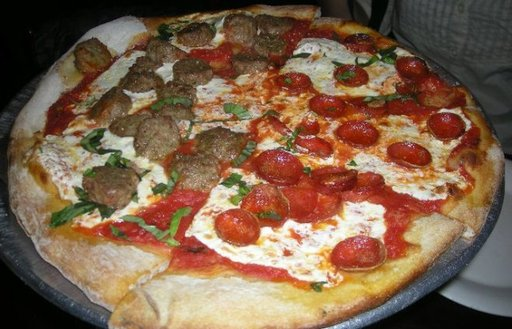

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(135)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

### **Transforming Data**

We have to convert the data to Tensors to work with Pytorch

Transforming with `torchvision.transforms`

In [ ]:
data_transform = transforms.Compose([
    # first resize all the images
    transforms.Resize(size=(64,64)),
    # flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.6),


    # turn the images into a torch.Tensor
    transforms.ToTensor()
])

Let's plot now

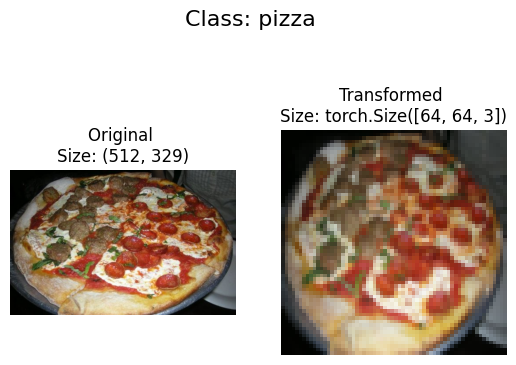

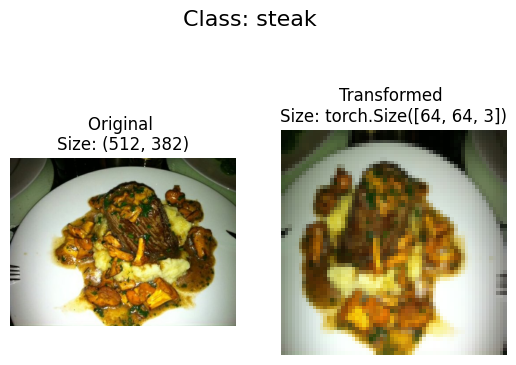

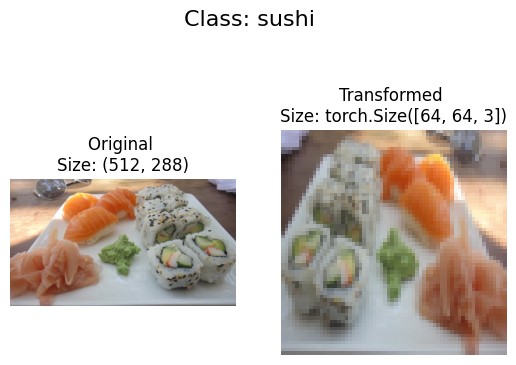

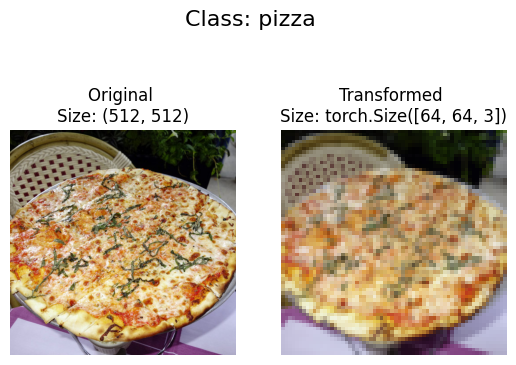

In [ ]:
def plot_transformed_images(image_paths, transform, n=4, seed=135):
  """
  Plot a series of random images from image_paths.

  Will open n image paths from image_paths, transform them with the transform and plot them side by side


  Args:
    image_paths (list) : List of target image paths
    transform (PyTorch Transforms) : Transforms to apply to images
    n (int) : Number of images to plot
    seed (int) : Random seed for the random generator
  """
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image

      transformed_image = transform(f).permute(1,2,0) # permute will help change the shape of
                                                      # the image to suit matplotlib, since pytorch
                                                      # default it [C,H,W] while matplotlib uses [H,W,C]

      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, transform=data_transform, n=4)

Generally a larger shape of image, the more information a model can recover, for example an image of size `[256,256,3]` will have 16x more pixels than an image of size `[64,64,3]`. But more pixels require more computation

### **Loading Image data using `ImageFolder`**

We can make use of `torchvision.datasets.ImageFolder`, where we can pass it the file path of a target image directory as well as the series of transforms we would like to perform on the images. Let's test it

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)


test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)


print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 600
    Root location: pizza_steak_bibimbap_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.6)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 200
    Root location: pizza_steak_bibimbap_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.6)
               ToTensor()
           )


Let's check the classes

In [69]:
class_names = train_data.classes
class_names

['bibimbap', 'pizza', 'steak', 'sushi']

In [ ]:
# let's see them as dict
class_dict = train_data.class_to_idx
class_dict

{'bibimbap': 0, 'pizza': 1, 'steak': 2, 'sushi': 3}

In [ ]:
len(train_data), len(test_data)

(600, 200)

Let's se the data

In [ ]:
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1529, 0.1137, 0.1490,  ..., 0.7098, 0.7098, 0.7176],
         [0.1333, 0.1529, 0.3882,  ..., 0.6902, 0.6745, 0.6667],
         [0.1137, 0.2588, 0.4275,  ..., 0.6941, 0.6549, 0.6353],
         ...,
         [0.0431, 0.0471, 0.0471,  ..., 0.2471, 0.1608, 0.1176],
         [0.0471, 0.0431, 0.0471,  ..., 0.1216, 0.1098, 0.1176],
         [0.0471, 0.0471, 0.0471,  ..., 0.1294, 0.1059, 0.1137]],

        [[0.0784, 0.0549, 0.0980,  ..., 0.6667, 0.6863, 0.6902],
         [0.0549, 0.0706, 0.3098,  ..., 0.6431, 0.6314, 0.6157],
         [0.0471, 0.1765, 0.3176,  ..., 0.6431, 0.6196, 0.5765],
         ...,
         [0.0431, 0.0431, 0.0471,  ..., 0.2549, 0.1686, 0.1255],
         [0.0471, 0.0431, 0.0471,  ..., 0.1373, 0.1216, 0.1255],
         [0.0471, 0.0471, 0.0471,  ..., 0.1451, 0.1137, 0.1216]],

        [[0.0392, 0.0314, 0.0941,  ..., 0.4392, 0.5608, 0.5765],
         [0.0235, 0.0431, 0.3137,  ..., 0.4863, 0.4824, 0.4275],
         [0.0314, 0.1647, 0.2510,  ..., 0.53

So, our images are of the form of a tensor, of shape `[3,64,64]` and the labels are in the form of an integer relating to a specific class.



Original Shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Permuted Shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'bibimbap')

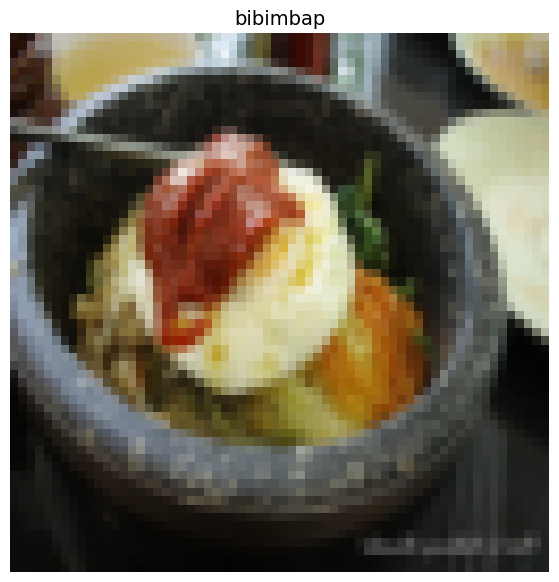

In [ ]:
img_permute = img.permute(1,2,0) # whenever dealing with pytorch and matplotlib, you have to permute it

print(f"Original Shape: {img.shape} -> [color_channels, height, width]")
print(f"Permuted Shape: {img_permute.shape} -> [height, width, color_channels]")



# plot the image

plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

We have reduced the image size, `512x512` to `64x64` pixels, hence its more pixalted

### **Turn Loaded Images to `DataLoader`**

We will be using `torch.utils.data.DataLoader`, turning our `Dataset` into `DataLoader` makes them iterable so a model can go through and learn the relationships between samples and targets (feature and labels)


We will be using `batch_size=1` and `num_workers=1`.

`num_workers` define how many subprocesses will be created to load your data, the higher value `num_workers` is set to, the more compute power PyTorch will use to load your data. You can set it to the total number of CPUs on the machine

In [ ]:
print(os.cpu_count())

2


In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, shuffle=True,num_workers=2, batch_size=1)


test_dataloader = DataLoader(test_data, batch_size=1, num_workers=2, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb112a08d10>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb112392490>)

Now, our data is iterable, let's see its shape and size

In [ ]:
img, label = next(iter(train_dataloader))


print(f"Image Shape: {img.shape}  -> [batch_size, color_channels, height, width]")
print(f"Label: {label.shape}")

Image Shape: torch.Size([1, 3, 64, 64])  -> [batch_size, color_channels, height, width]
Label: torch.Size([1])


### **Custom `Dataset`**

We can also pre-built `Dataset` creator like `torchvision.datasets.ImageFolder()`.


We will replace or replicate `torchvision.datasets.ImageFolder()` by subclassing `torch.utils.data.Dataset`


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Any, Callable, Dict, List, Optional, Tuple

In [ ]:
train_data.classes, train_data.class_to_idx

(['bibimbap', 'pizza', 'steak', 'sushi'],
 {'bibimbap': 0, 'pizza': 1, 'steak': 2, 'sushi': 3})

Make a helper function to get the class names, we wil get the class names using `os.scandir()` to traverse a target directory , and then raise an error if not found

In [ ]:
target_directory = train_dir
print(f"Target Directory: {target_directory}")

class_names = []
for entry in os.scandir(target_directory):
  class_names.append(entry.name)

print(f"Class Names: {class_names}")

Target Directory: pizza_steak_bibimbap_sushi/train
Class Names: ['sushi', 'pizza', 'steak', 'bibimbap']


In [ ]:
# making it a full function
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory

  """

  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")


  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(train_dir)

(['bibimbap', 'pizza', 'steak', 'sushi'],
 {'bibimbap': 0, 'pizza': 1, 'steak': 2, 'sushi': 3})

### Making a custom `Dataset` to replicate `ImageFolder`




In [ ]:
 # Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fb1129ca310>,
 <__main__.ImageFolderCustom at 0x7fb112a3c550>)

In [ ]:
len(train_data_custom), len(test_data_custom)

(600, 200)

In [ ]:
train_data_custom.classes

['bibimbap', 'pizza', 'steak', 'sushi']

Let's see if they are the same

In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### **Function to Display Random Images**

Let's visualize the data, and make a function `display_random_images()` that help us visualize the images in our `Dataset`.

Specifically:

1. Take in a `Dataset` and a number of other parameters such as `classes`, the number of images to display `n` and a random seed.

2. To prevent the display getting out of hand, we will cap `n` at 10 images.

3. Get a list of random samples indexes to plot.


In [ ]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):


  if n > 10:
    n=10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")


  if seed:
    random.seed(seed)


  random_sample_idx = random.sample(range(len(dataset)), k=n)


  plt.figure(figsize=(16,8))

  #  Loop through samples and display random samples
  for i, targ_sample in enumerate(random_sample_idx):
      targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

      # Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
      targ_image_adjust = targ_image.permute(1, 2, 0)

      # Plot adjusted samples
      plt.subplot(1, n, i+1)
      plt.imshow(targ_image_adjust)
      plt.axis("off")
      if classes:
          title = f"class: {classes[targ_label]}"
          if display_shape:
              title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)




In [ ]:
print(class_names)

['sushi', 'pizza', 'steak', 'bibimbap']


In [ ]:
print(train_data.classes)

['bibimbap', 'pizza', 'steak', 'sushi']


For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


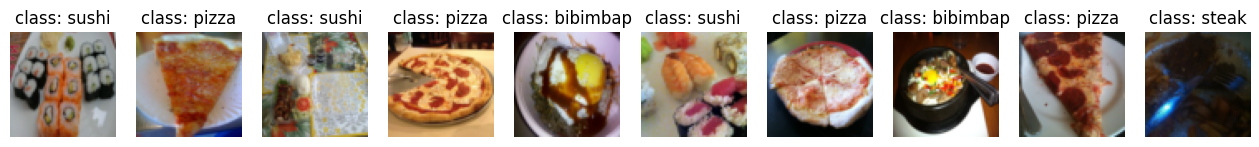

In [ ]:
display_random_images(train_data,
                      n=12,
                      classes=train_data.classes,
                      seed=None)

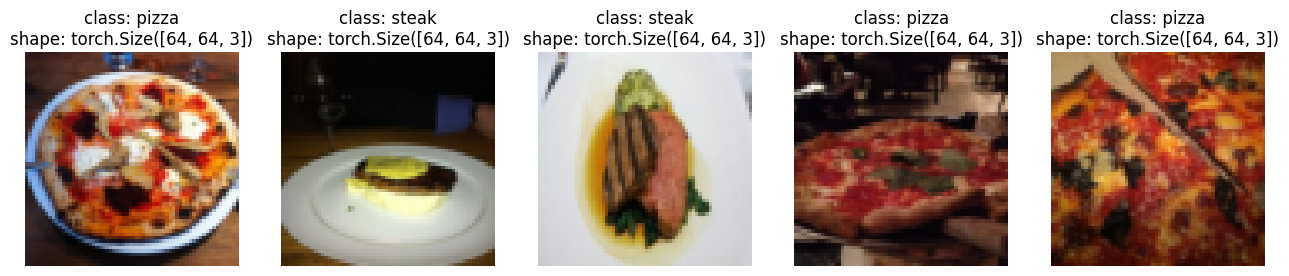

In [ ]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=train_data_custom.classes,
                      seed=None) # Try setting the seed for reproducible images

### Turn custom loaded images into `DataLoader`




In [ ]:
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=1,
                                     num_workers=2,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=1,
                                    num_workers=2,
                                    shuffle=False)


train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fb1125ce390>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb111ae3e10>)

Do the shape and samples look the same?

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))

print(f"Image Shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]


### **Other forms of Transforms**

There are many other forms of transforms that we can do, and we can see them all in `torchvision.transforms` documentation. The purpose of transforms is to alter the images in some way, like turning it to a tensor, or cropping it or rotating it randomly. This is often called **data augmentation**.

It is the process of altering the data in such a way that you artificially increase the diversity of the training set.

This helps train a mode better for generalization.

The main parameter to pay attention to in `transforms.TrivialAugmentWide()` is `num_magnitude_bins=31`. It defines how much of a range an intensity value will be picked to apply a certain transform `0` being no range and `31` being maximum range.


We can incorporate `transforms.TrivialAugmentWide()` into `transforms.Compose()`

In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

We usually don't perform data augmentation on the test set. The idea of data augmentation is to artifically increase the diversity of the training set to better predict on the testing set.

However, we have to make sure that the test set images are transformed to tensors. We size the test images to the same size as our training images.

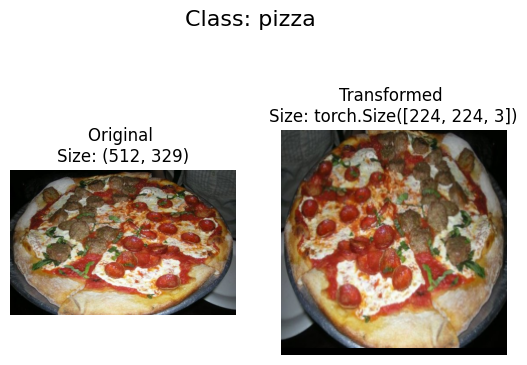

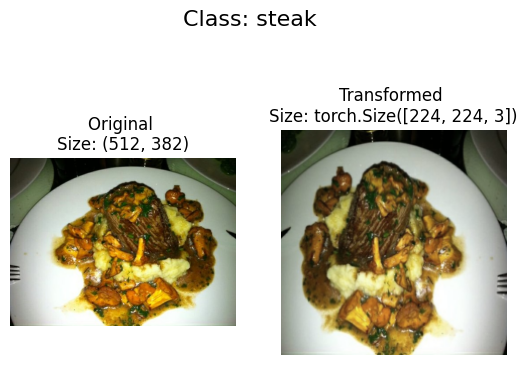

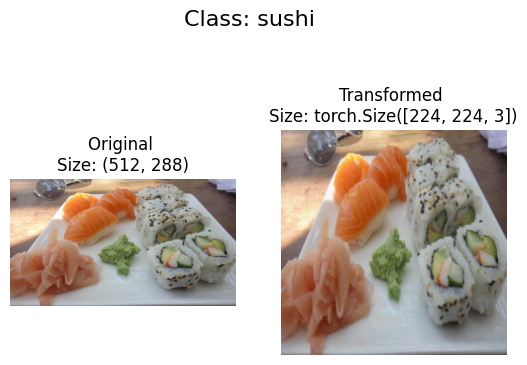

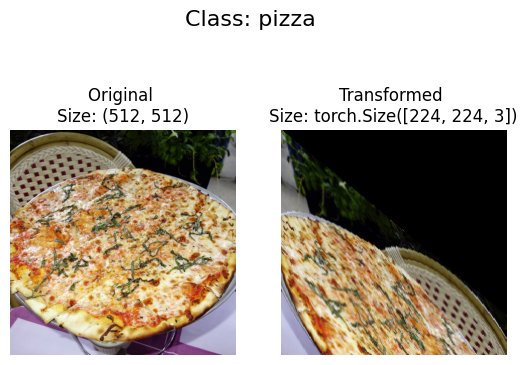

In [ ]:
# let's test this out
image_path_list = list(image_path.glob("*/*/*.jpg"))


# plot random images
plot_transformed_images(image_path_list, transform=train_transforms, n=4, seed=135)

### **Model 0: TinyVGG  without data augmentation**

We've seen how to turn our data from images in folders to transformed tensors.

Let's construct a computer vision model to see if we can classify if an image is of pizza, steak, bibimbap or sushi.

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

Since this is the simple transforms:
1. Load the data, turning each of our training and test folders first into a `Dataset` with `torchvision.datasets.ImageFolder()`

2. Then into a `DataLoader` using `torch.utils.data.DataLoader`

In [ ]:
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7fb1116e4e90>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb111aa9210>)

### **Create TinyVGG Model Class**

Let's create the same model, which we did in the previous notebook

In [ ]:
class TinyVGG(nn.Module):
  """
  Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from previous notebook
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )


    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*16*16,
                out_features=output_shape)
    )


  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x




torch.manual_seed(135)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=15,
                  output_shape=len(train_data_simple.classes)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3840, out_features=4, bias=True)
  )
)

One way to speed up deep learning models computing on a GPU is to leverage **operator fusion**.

This means in the `forward()` method in out model above, instead of calling a layer block and reassigning `x` every time, we call each block in succession. This saves the time spend reassigning `x` and focuses only on computing on `x`.



### Try a forward pass on a single image(testing the model)

A good way to test a model is to do a forward pass on a single piece of data.

1. Get a batch of images and labels from the `DataLoader`

2. Get a single image from the batch and `unsqueeze()` the image so it has a batch size of `1`.

3. Perform inference on a single image

In [ ]:
img_batch, label_batch = next(iter(train_dataloader_simple))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
img_single.shape, label_single.shape

(torch.Size([1, 3, 64, 64]), torch.Size([]))

In [70]:
model_0.eval()

with torch.inference_mode():
  pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Output logits:
tensor([[ 0.0048, -0.0553,  0.0133,  0.0037]], device='cuda:0')

Output prediction probabilities:
tensor([[0.2532, 0.2385, 0.2554, 0.2529]], device='cuda:0')

Output prediction label:
tensor([2], device='cuda:0')

Actual label:
3


### Use `torchinfo` to get an idea of the shapes going though our model

In [71]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 4]                    --
├─Sequential: 1-1                        [1, 15, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 15, 64, 64]           420
│    └─ReLU: 2-2                         [1, 15, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 15, 64, 64]           2,040
│    └─ReLU: 2-4                         [1, 15, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 15, 32, 32]           --
├─Sequential: 1-2                        [1, 15, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 15, 32, 32]           2,040
│    └─ReLU: 2-7                         [1, 15, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 15, 32, 32]           2,040
│    └─ReLU: 2-9                         [1, 15, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 15, 16, 16]           --
├─Seq

This output of `torchinfo.summary()` gives us a whole bunch of information about our model. Such as `Total Params` and the `Estimated total size (MB)` which is the size of our model.



### **Create train & test loop function**

We have our data and we have our model, let's make training loop and testing loop.

In [72]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):

      # move data
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss = loss_fn(y_pred,y)

      train_loss += loss.item()

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()


      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)


    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

Let's do the same for `test_step()` function

In [73]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [74]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [75]:
# Set random seeds
torch.manual_seed(135)
torch.cuda.manual_seed(135)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=15,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.002)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3891 | train_acc: 0.2643 | test_loss: 1.3556 | test_acc: 0.2857
Epoch: 2 | train_loss: 1.2963 | train_acc: 0.4112 | test_loss: 1.2654 | test_acc: 0.4286
Epoch: 3 | train_loss: 1.2259 | train_acc: 0.4589 | test_loss: 1.2103 | test_acc: 0.4107
Epoch: 4 | train_loss: 1.1714 | train_acc: 0.4759 | test_loss: 1.2167 | test_acc: 0.4777
Epoch: 5 | train_loss: 1.1384 | train_acc: 0.4978 | test_loss: 1.1572 | test_acc: 0.4375
Epoch: 6 | train_loss: 1.1177 | train_acc: 0.5389 | test_loss: 1.1092 | test_acc: 0.4821
Epoch: 7 | train_loss: 1.0223 | train_acc: 0.5872 | test_loss: 1.0716 | test_acc: 0.5312
Epoch: 8 | train_loss: 1.0051 | train_acc: 0.5784 | test_loss: 1.0707 | test_acc: 0.5580
Epoch: 9 | train_loss: 0.9021 | train_acc: 0.6310 | test_loss: 1.1168 | test_acc: 0.5179
Epoch: 10 | train_loss: 0.8364 | train_acc: 0.6891 | test_loss: 1.0842 | test_acc: 0.5268
Epoch: 11 | train_loss: 0.7543 | train_acc: 0.6880 | test_loss: 1.1851 | test_acc: 0.5223
Epoch: 12 | train_l

The performance of the model is very poor, Let's improve it

### Loss Curves

We can also evaluate the performance of the model by making model's loss curves, they show the model's result over time.

In [76]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

All of these keys would be extracted and then loss curve will be plotted

In [77]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """
  Plot the training curves of a results dictionary.

  Args:
    results (dict) : dictionary containing the values, like:
      {"train_loss": [....],
      "train_acc" : [.....],
      .. and so on}

  """

  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  # so we got all the data required

  plt.figure(figsize=(15,7))

  # plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()



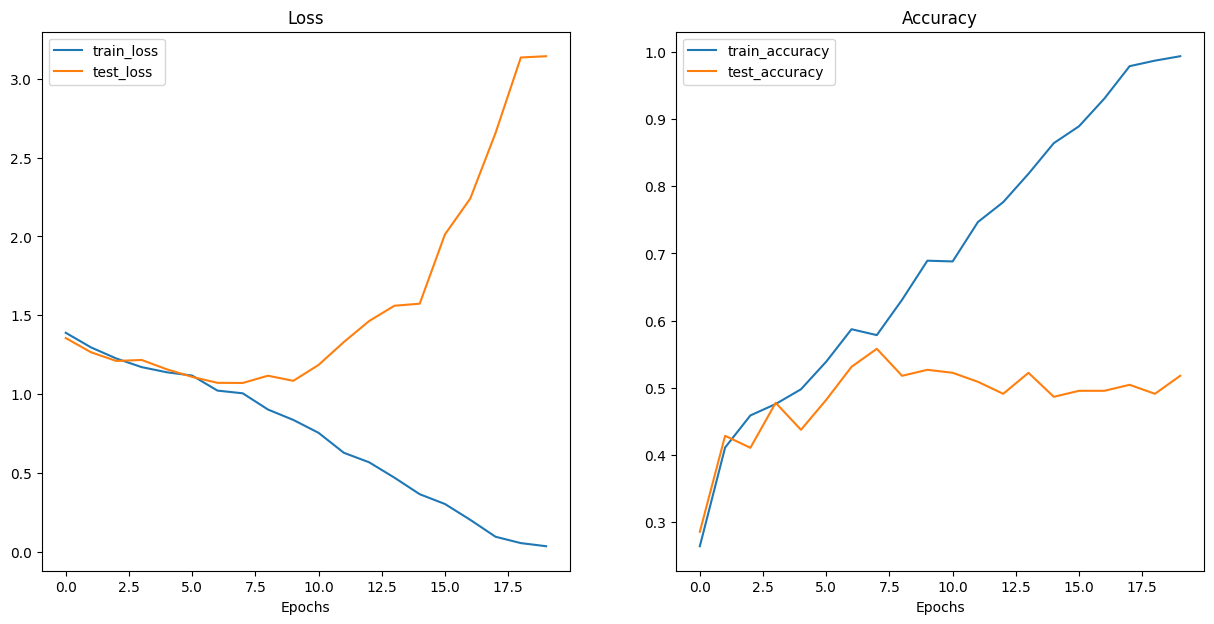

In [78]:
# now let's see
plot_loss_curves(model_0_results)

It is kind of improving, but is still very bad

### **Ideal Loss Curve**

Looking at the training and test loss curve is a great way to see whether our model is overfitting. An overfitting model is one that performs better on the training set than the validation or the test set.

**If our training loss is far lower than the test loss, then the model is overfitting**

The other side to it is **underfitting**.

![plots](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg)

#### How to deal with overfitting

Since the main problem with overfitting is that our model is fitting the training data too well, we want to make use of techniques to work it out.

A common technique of preventing overfitting is known as **regularization**.

We can also :

1. Get more data : Since having more data gives the model more opportunities to learn the patterns, that may be generalization to new examples.

2. Simplify the model : Maybe the model is too complicated, simplify the model to reduce the number of layers or reduce the number of hidden units in each layer.

3. Use data augmentation : Manipulate the training data in a way so that, it's harder for the model to learn as it artificially adds more variety to the data.

4. Transfer Learning : It involves leveraging patterns, one model has learned to use as the foundation.

5. Dropout layers : They randomly remove connections between hidden layers in neural network.

6. Learning Rate Decay : Slowly decrease the learning rate as the model trains.

7. Early Stopping : It stops the model training before it begins to overfit

#### How to deal with underfitting

When the model is underfitting, it is considered to have poor predictive power on the training and the test sets.


We can :
1. Add more layers : We can add more layers, or more hidden neurons, to increase the predicitive power

2. Tweak the learning rate :Maybe the learning rate is too high, we might want to lower the learning rate

3. Transfer learning : same as before

4. Train for Longer : Maybe the model needs more time to learn the representation of data.

5. Less regularization : Maybe you are trying to prevent overfitting so much , that it is underfitting

### **Tiny VGG With Data Augmentation**

This time the data will be loaded and **data augmentation** will be used,

In [79]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

Now, let's turn our images into `Dataset` using `torchvision.datasets.ImageFolder()` and then into `DataLoader` with `torch.utils.data.DataLoader()`

#### Create Train and Test

In [80]:
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 600
     Root location: pizza_steak_bibimbap_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 200
     Root location: pizza_steak_bibimbap_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

We will make `DataLoader` with a `batch_size=32` and with `num_workers=os.cpu_count()`

In [81]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(135)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)


test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7fb115548dd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb111aa0310>)

#### MODEL 1

In [82]:
torch.manual_seed(135)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=15,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3840, out_features=4, bias=True)
  )
)

We already have the training and testing functions, let's use them

In [83]:
torch.manual_seed(135)
torch.cuda.manual_seed(135)

NUM_EPOCHS = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_1.parameters(), lr=0.001)


# time it
from timeit import default_timer as timer
start_time = timer()


# train the model
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)


end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3875 | train_acc: 0.2664 | test_loss: 1.3799 | test_acc: 0.2589
Epoch: 2 | train_loss: 1.3701 | train_acc: 0.2977 | test_loss: 1.3467 | test_acc: 0.4598
Epoch: 3 | train_loss: 1.3336 | train_acc: 0.3893 | test_loss: 1.2339 | test_acc: 0.4330
Epoch: 4 | train_loss: 1.2866 | train_acc: 0.3958 | test_loss: 1.2042 | test_acc: 0.4196
Epoch: 5 | train_loss: 1.2754 | train_acc: 0.4024 | test_loss: 1.2144 | test_acc: 0.4286
Epoch: 6 | train_loss: 1.2586 | train_acc: 0.4359 | test_loss: 1.1887 | test_acc: 0.4464
Epoch: 7 | train_loss: 1.2729 | train_acc: 0.4073 | test_loss: 1.1841 | test_acc: 0.4732
Epoch: 8 | train_loss: 1.2378 | train_acc: 0.4243 | test_loss: 1.2255 | test_acc: 0.4241
Epoch: 9 | train_loss: 1.2486 | train_acc: 0.4298 | test_loss: 1.1638 | test_acc: 0.5089
Epoch: 10 | train_loss: 1.2346 | train_acc: 0.4359 | test_loss: 1.2017 | test_acc: 0.4643
Epoch: 11 | train_loss: 1.2476 | train_acc: 0.3931 | test_loss: 1.1734 | test_acc: 0.4643
Epoch: 12 | train_l

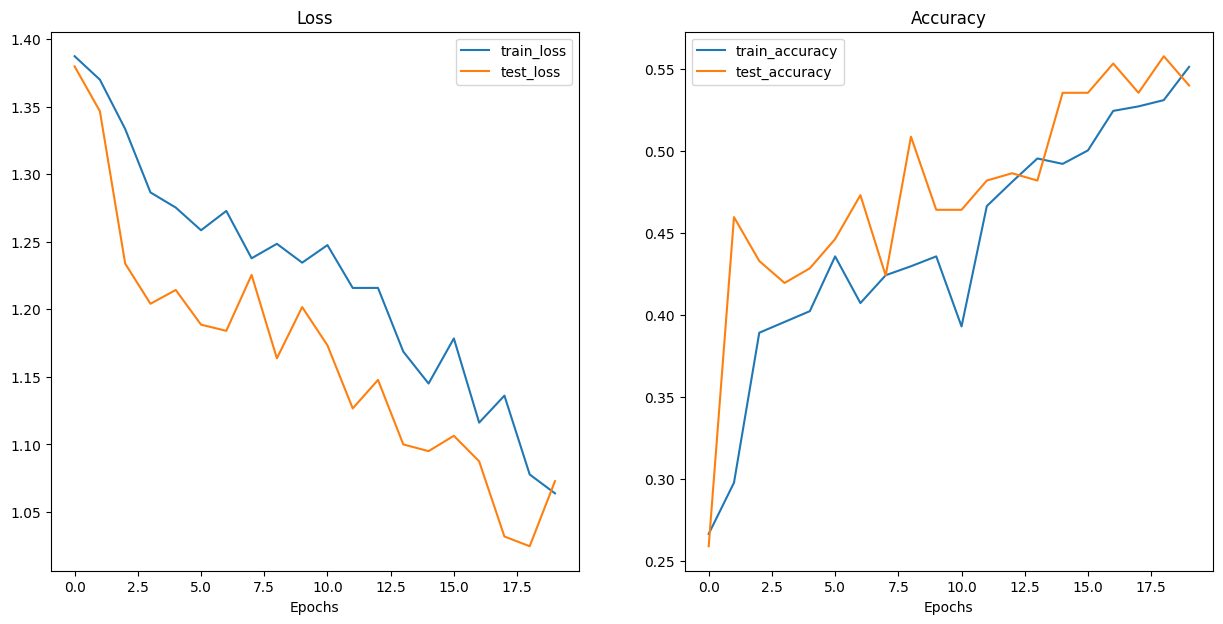

In [84]:
plot_loss_curves(model_1_results)

Well, it looks like our model hasn't performed too well her either

### **Compare the Models**

In [85]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.389142,0.264254,1.355646,0.285714
1,1.296304,0.411184,1.265374,0.428571
2,1.225943,0.458882,1.210345,0.410714
3,1.171403,0.475877,1.216747,0.477679
4,1.138400,0.497807,1.157242,0.437500
5,1.117738,0.538925,1.109242,0.482143
6,1.022335,0.587171,1.071589,0.531250
7,1.005121,0.578399,1.070712,0.558036
8,0.902140,0.631031,1.116799,0.517857
9,0.836380,0.689145,1.084174,0.526786


In [86]:
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.387474,0.266447,1.379943,0.258929
1,1.370102,0.297697,1.346731,0.459821
2,1.333578,0.389254,1.233904,0.433036
3,1.286610,0.395833,1.204170,0.419643
4,1.275399,0.402412,1.214373,0.428571
5,1.258592,0.435855,1.188694,0.446429
6,1.272910,0.407346,1.184115,0.473214
7,1.237822,0.424342,1.225533,0.424107
8,1.248562,0.429825,1.163772,0.508929
9,1.234598,0.435855,1.201709,0.464286


Let's visualize them together

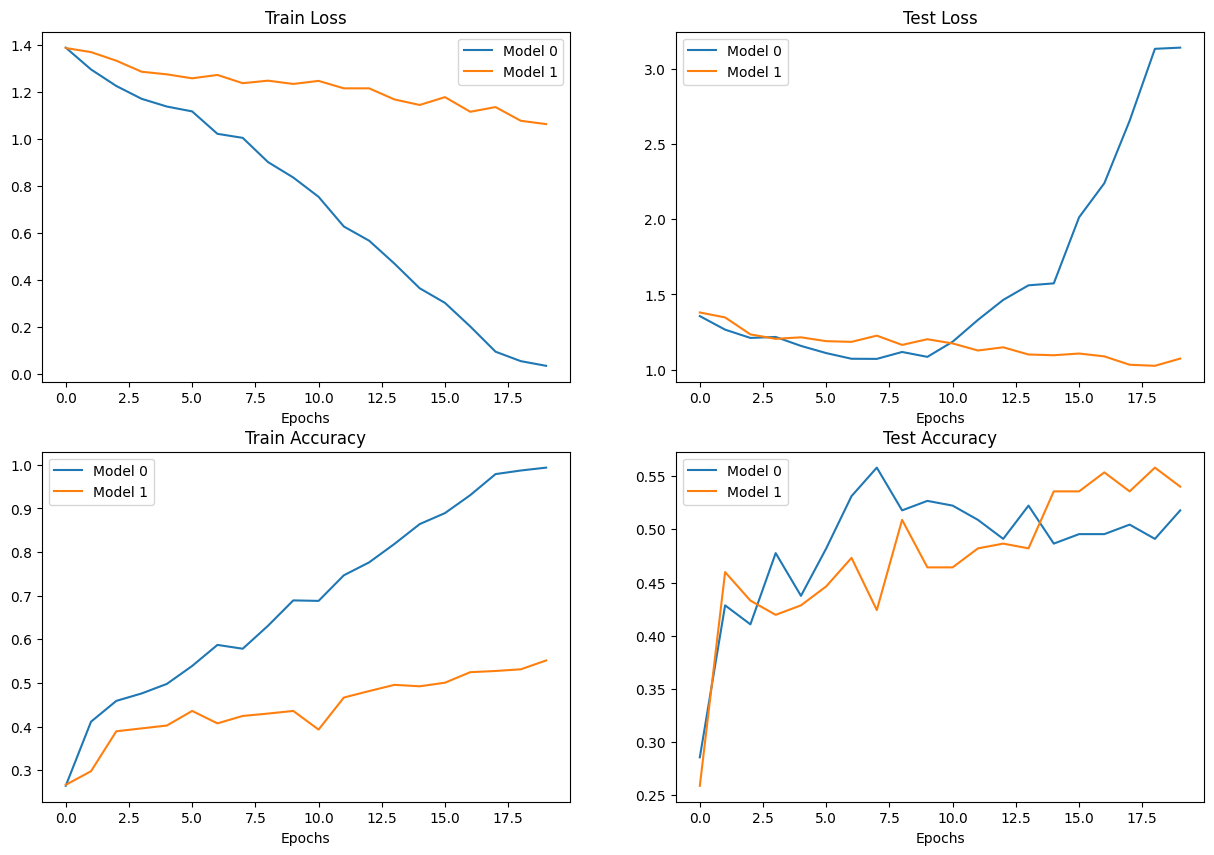

In [87]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

Bad Performance

### **Making Prediction**

If we have trained a model on certain dataset, its obvious that we want to do some predictions. In this case, we can load an image, and then preprocess it in a way that matches the type of data our model was trained on.



In [88]:
import requests

custom_image_path = data_path/"04-pizza-dad.jpeg"


# download the image
# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")


Load it back

In [89]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image shape: {custom_image_uint8.shape} -> [color_channels, height, width]")
print(f"Custom Image tensor: \n{custom_image_uint8}")


Custom image shape: torch.Size([3, 4032, 3024]) -> [color_channels, height, width]
Custom Image tensor: 
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], d

The value of tensors are from 0-255, but our model has 0-1. Let's do that

In [90]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image = custom_image/255

print(f"Custom image shape: {custom_image.shape} -> [color_channels, height, width]")
print(f"Custom Image tensor: \n{custom_image}")

Custom image shape: torch.Size([3, 4032, 3024]) -> [color_channels, height, width]
Custom Image tensor: 
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 

Shape is another issue, since we trained on [3,64,64] and this is [3,4032,3024]. Let's fix this

In [91]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64,64))
])

custom_image_transformed = custom_image_transform(custom_image)


# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


There's still one more thing, we are missing, there's one more dimension, and that is batch size. Our model expects the input to be `[NCHW]` where `N` is the bach size,

In [92]:
model_1.eval()
with torch.inference_mode():

  custom_image_transformed_batch_size = custom_image_transformed.unsqueeze(dim=0)

  # Print out different shapes
  print(f"Custom image transformed shape: {custom_image_transformed.shape}")
  print(f"Unsqueezed custom image shape: {custom_image_transformed_batch_size.shape}")

  # Make a prediction on image with an extra dimension
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


There are three most common issues, peopl face at this time:

1. **Wrong Datatypes** - Model expects `torch.float32`, while our original was `uint8`
2. **Wrong Device** - Model was on the target `device` , whereas the target data was not, so move it
3. **Wrong Shape** - Model expects input images in `[NCHW]`, whereas it was `[CHW]`

In [93]:
# let's look at the prediciton
custom_image_pred

tensor([[-0.5969, -0.6056, -0.8673,  0.4115]], device='cuda:0')

Convert the logits to prediction labels

In [94]:
print(f"Predicition logits: \n{custom_image_pred}\n")
print(f"Output prediction probabilities: \n{torch.softmax(custom_image_pred, dim=1)}\n")

print(f"Output prediction labels: \n{torch.argmax(torch.softmax(custom_image_pred, dim=1), dim=1)}")

Predicition logits: 
tensor([[-0.5969, -0.6056, -0.8673,  0.4115]], device='cuda:0')

Output prediction probabilities: 
tensor([[0.1820, 0.1804, 0.1388, 0.4988]], device='cuda:0')

Output prediction labels: 
tensor([3], device='cuda:0')


In [95]:
# and the label
print(f"Output prediction labels: \n{train_data_augmented.classes[torch.argmax(torch.softmax(custom_image_pred, dim=1), dim=1)]}")

Output prediction labels: 
sushi


You can see the model gave almost equal weight sto all, so it's trying to pick all four classes at once. This model is poorly trained

#### Making it a function

Doing all this is hectic, we can just make one function that does this:

1. Takes in target image path and convert to right datatype
2. Make sure the target image pixel values are in the range `[0,1]`
3. Make sure the model is on the target device
4. Make a prediciton on the target image with trained model
5. Convert the logits to probabilities to labels
6. Plot the target image alongside the model prediction and prediction probability

In [96]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str]=None,
                        transform=None,
                        device: torch.device=device):

  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image = target_image/255

  if transform:
    target_image = transform(target_image)

  model.to(device)


  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(dim=0)

    target_image_pred = model(target_image.to(device))


  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)




Let's test this out

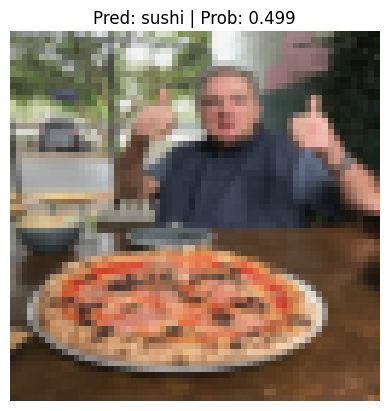

In [97]:
pred_and_plot_image(model=model_1,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device = device)